# Esercitazione 12
## Wavelets
#### Sommario
Questa esercitazione esplora la Trasformata di Fourier Discreta (DFT) e la Trasformata Wavelet Discreta (DWT). Nella prima parte si analizzano segnali sintetici con picchi isolati confrontando la DFT e la CWT; nella seconda parte si lavora su un segnale reale (`chirp.mat`) per eseguire decomposizione, ricostruzione e compressione tramite DWT.


In [2]:
import numpy as np 
import matplotlib.pylab as plt 
from scipy import fftpack as f
import scipy.signal as ssi
import scipy.io as sio
import pywt
import scipy.io.wavfile

#### Esercizio 1 — DFT e DWT

(a) Considerare un segnale di dimensione 512 con tutti zeri ed un picco al campione 200 che vale 50. Effettuare la FFT del segnale e visualizzare il modulo dei coefficienti ottenuti. Ripetere lo stesso esercizio con un segnale con un picco a 100.

(b) Il comando `cwt(x, scipy.signal.ricker, np.arange(1,48))` della libreria `scipy.signal` calcola la trasformata wavelet continua del segnale `x` (wavelet "ricker" = Mexican hat). Utilizzare `cwt` per calcolare la trasformata wavelet continua dei due segnali introdotti precedentemente e fare un plot dei coefficienti ottenuti.

(c) Costruire un segnale con due picchi molto vicini e calcolare la trasformata wavelet continua, visualizzare i coefficienti ottenuti e osservare come cambia il plot all'avvicinarsi dei due picchi.


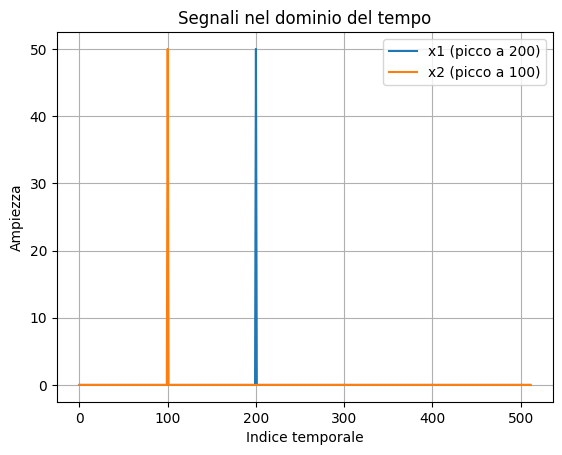

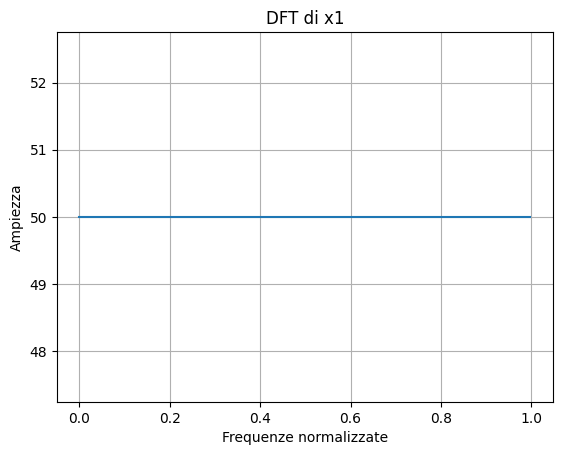

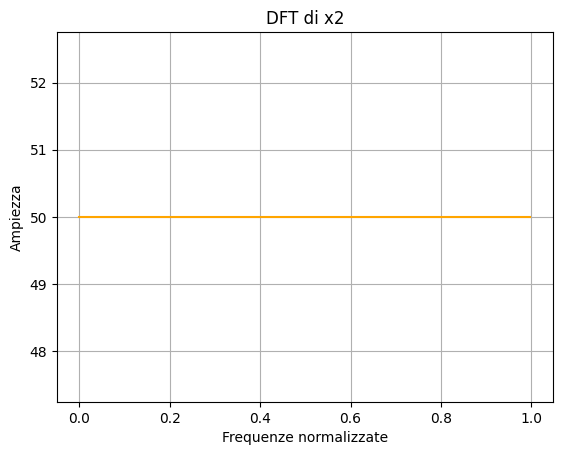

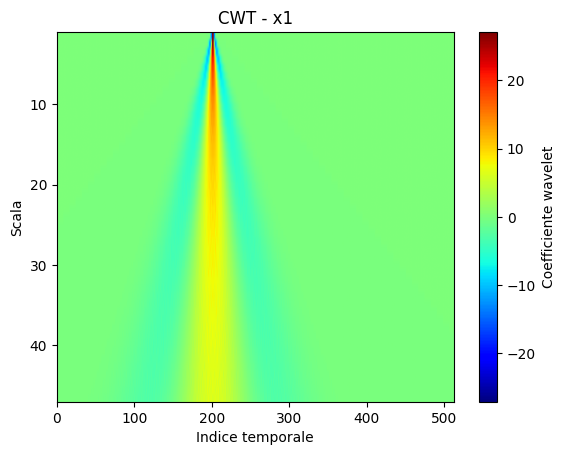

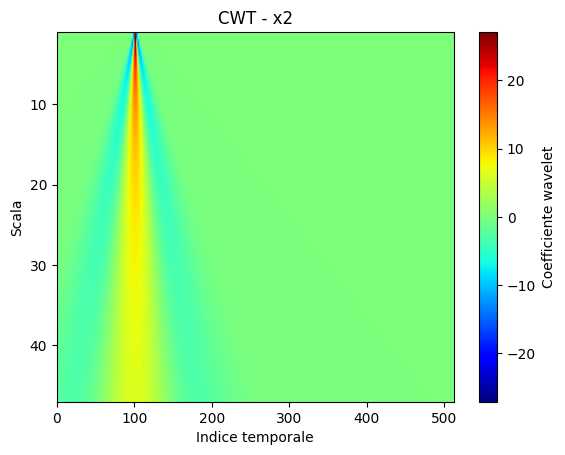

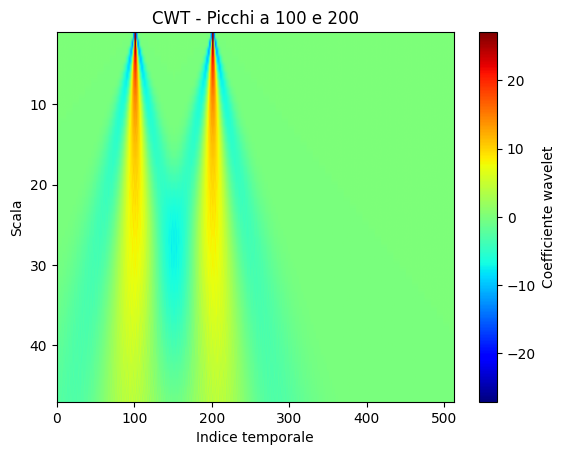

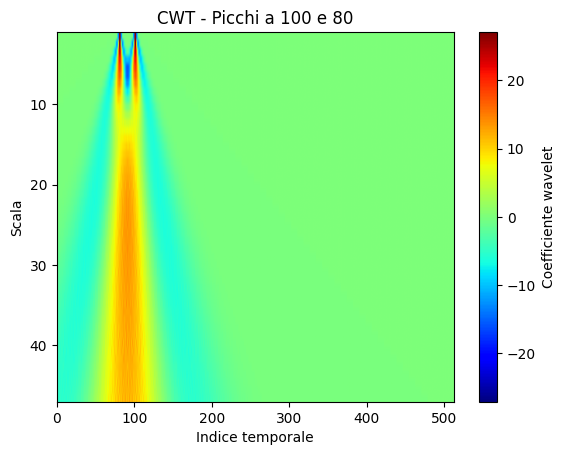

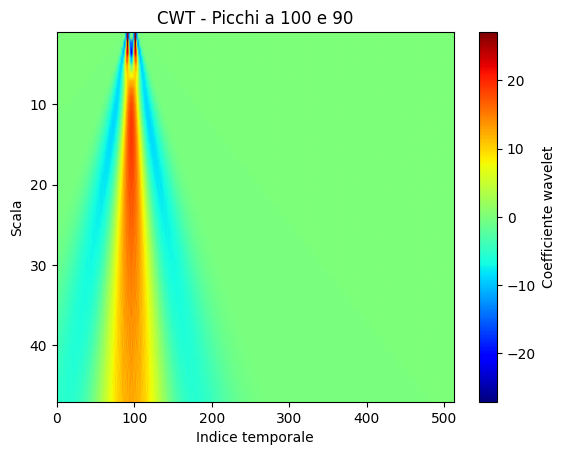

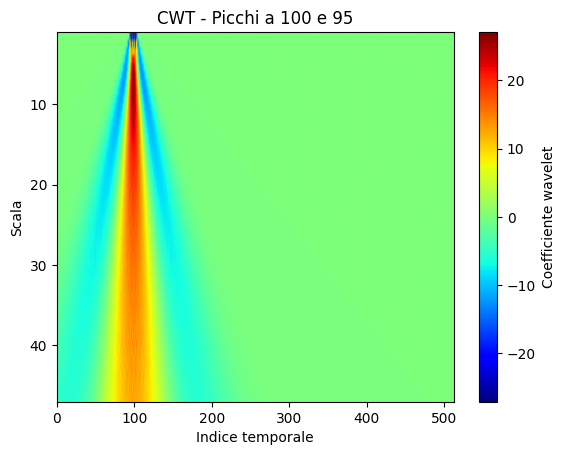

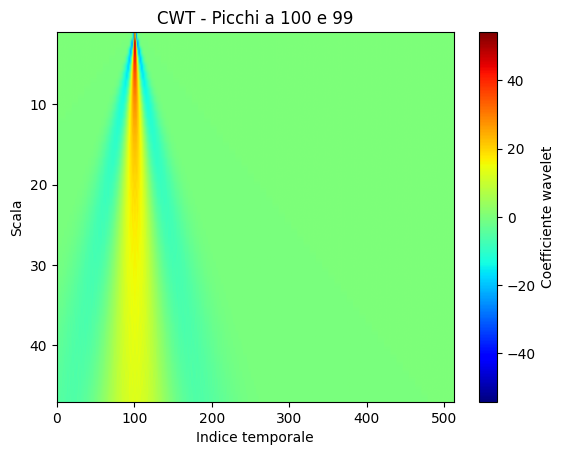

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as f
import pywt  # per la CWT

# ======================================================
# Esercizio 1(a) - Due segnali con picchi singoli
# ======================================================

# Segnale 1: picco a 200
x1 = np.zeros(512)
x1[200] = 50
X1 = f.fft(x1)

# Segnale 2: picco a 100
x2 = np.zeros(512)
x2[100] = 50
X2 = f.fft(x2)

# Plot nel dominio del tempo
plt.figure()
plt.plot(x1, label='x1 (picco a 200)')
plt.plot(x2, label='x2 (picco a 100)')
plt.xlabel('Indice temporale')
plt.ylabel('Ampiezza')
plt.title('Segnali nel dominio del tempo')
plt.legend()
plt.grid(True)
plt.show()

# Plot nel dominio delle frequenze
freqs = np.arange(512) / 512  # Frequenze normalizzate
plt.figure()
plt.plot(freqs, np.abs(f.fftshift(X1)), label='|X1|')
plt.xlabel('Frequenze normalizzate')
plt.ylabel('Ampiezza')
plt.title('DFT di x1')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(freqs, np.abs(f.fftshift(X2)), label='|X2|', color='orange')
plt.xlabel('Frequenze normalizzate')
plt.ylabel('Ampiezza')
plt.title('DFT di x2')
plt.grid(True)
plt.show()

# ======================================================
# Esercizio 1(b) - Trasformata wavelet continua
# ======================================================

# Wavelet Mexican hat ("mexh" in PyWavelets), scale da 1 a 47
scales = np.arange(1, 48)

coeffs_X1, freqs_X1 = pywt.cwt(x1, scales, 'mexh')
plt.imshow(coeffs_X1, extent=[0, 512, scales[-1], scales[0]],
           aspect='auto', cmap='jet',
           vmax=np.abs(coeffs_X1).max(), vmin=-np.abs(coeffs_X1).max())
plt.colorbar(label='Coefficiente wavelet')
plt.title('CWT - x1')
plt.xlabel('Indice temporale')
plt.ylabel('Scala')
plt.show()

coeffs_X2, freqs_X2 = pywt.cwt(x2, scales, 'mexh')
plt.imshow(coeffs_X2, extent=[0, 512, scales[-1], scales[0]],
           aspect='auto', cmap='jet',
           vmax=np.abs(coeffs_X2).max(), vmin=-np.abs(coeffs_X2).max())
plt.colorbar(label='Coefficiente wavelet')
plt.title('CWT - x2')
plt.xlabel('Indice temporale')
plt.ylabel('Scala')
plt.show()

# ======================================================
# Esercizio 1(c) - Due picchi vicini
# ======================================================

def plot_wavelet_signal(sig, title):
    coeffs, freqs = pywt.cwt(sig, scales, 'mexh')
    plt.imshow(coeffs, extent=[0, 512, scales[-1], scales[0]],
               aspect='auto', cmap='jet',
               vmax=np.abs(coeffs).max(), vmin=-np.abs(coeffs).max())
    plt.colorbar(label='Coefficiente wavelet')
    plt.title(title)
    plt.xlabel('Indice temporale')
    plt.ylabel('Scala')
    plt.show()

# Caso 1: picchi a 100 e 200
x3 = np.zeros(512)
x3[100] = 50
x3[200] = 50
plot_wavelet_signal(x3, 'CWT - Picchi a 100 e 200')

# Caso 2: picchi a 100 e 80
x3 = np.zeros(512)
x3[100] = 50
x3[80] = 50
plot_wavelet_signal(x3, 'CWT - Picchi a 100 e 80')

# Caso 3: picchi a 100 e 90
x3 = np.zeros(512)
x3[100] = 50
x3[90] = 50
plot_wavelet_signal(x3, 'CWT - Picchi a 100 e 90')

# Caso 4: picchi a 100 e 95
x3 = np.zeros(512)
x3[100] = 50
x3[95] = 50
plot_wavelet_signal(x3, 'CWT - Picchi a 100 e 95')

# Caso 5: picchi a 100 e 99
x3 = np.zeros(512)
x3[100] = 50
x3[99] = 50
plot_wavelet_signal(x3, 'CWT - Picchi a 100 e 99')


#### Esercizio 2 — DWT e compressione

(a) Leggere il file `chirp.mat` utilizzando il comando:

```np.squeeze(sio.loadmat('chirp.mat')["x"])```
Fare un plot del segnale contenuto nel file.

(b) Con il comando `dwt(x, 'db4')` della libreria `pywt` ottenere la scomposizione al primo livello del segnale; il comando restituisce due vettori contenenti i coefficienti dell'approssimazione e del dettaglio. Utilizzando `upcoef` ottenere le approssimazioni `a` e i dettagli `d` al primo livello.

(c) Utilizzando `idwt` ricostruire il segnale. Confrontare il risultato ottenuto con la somma `d + a`, dove `d` e `a` sono i dettagli e le approssimazioni calcolate al punto precedente.

(d) Utilizzare `wavedec` della libreria `pywt` per avere più livelli di decomposizione (provare con 3 livelli).

(e) Comprimere il segnale eliminando i coefficienti di dettaglio meno espressi: calcolare la media del valore assoluto dei coefficienti di dettaglio al terzo livello ed azzerare i coefficienti inferiori a tale valore. Ricostruire il segnale con `waverec` e calcolare l'errore quadratico medio (MSE) rispetto al segnale originale.


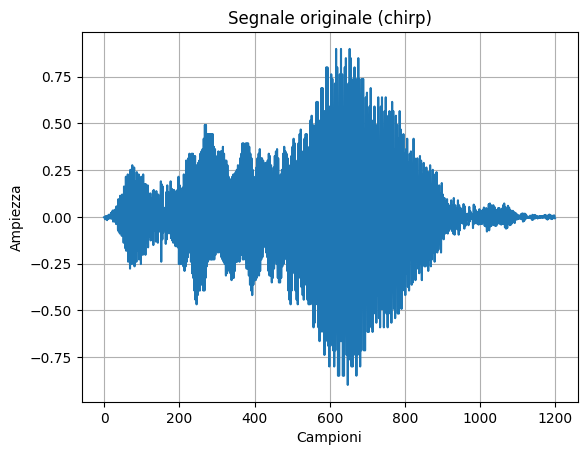

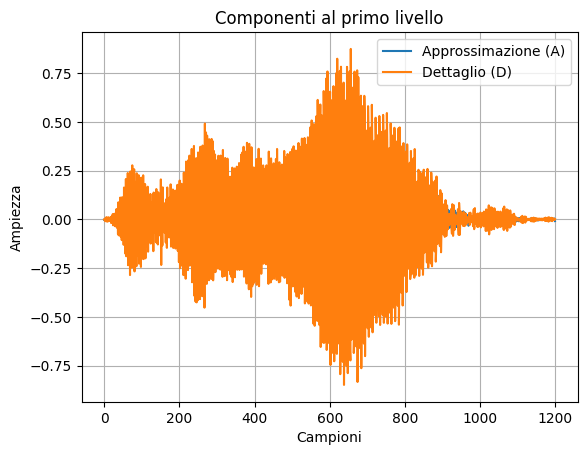

Max error: 0.000000e+00


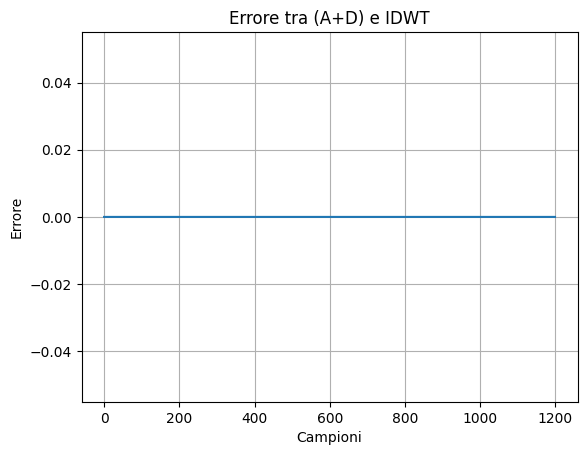

Errore di approssimazione (MSE) = 1.465604e-05


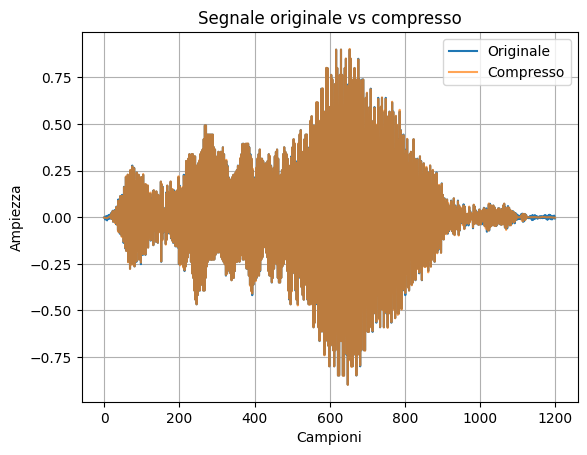

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.io.wavfile
import pywt

# ======================================================
# Esercizio 2(a) - Lettura e visualizzazione del segnale
# ======================================================
x = np.squeeze(sio.loadmat('chirp.mat')['x'])
scipy.io.wavfile.write('chirp.wav', 9000, x)  # Salvataggio come audio

plt.figure()
plt.plot(x)
plt.title('Segnale originale (chirp)')
plt.xlabel('Campioni')
plt.ylabel('Ampiezza')
plt.grid(True)
plt.show()

# ======================================================
# Esercizio 2(b) - DWT e ricostruzione delle componenti
# ======================================================
cA, cD = pywt.dwt(x, 'db4')  # Coefficienti di approssimazione e dettaglio

# Ricostruzione dei segnali A e D al primo livello
A = pywt.upcoef('a', cA, 'db4', take=len(x))
D = pywt.upcoef('d', cD, 'db4', take=len(x))

plt.figure()
plt.plot(A, label='Approssimazione (A)')
plt.plot(D, label='Dettaglio (D)')
plt.title('Componenti al primo livello')
plt.xlabel('Campioni')
plt.ylabel('Ampiezza')
plt.legend()
plt.grid(True)
plt.show()

# ======================================================
# Esercizio 2(c) - Ricostruzione e confronto
# ======================================================
x_rec = pywt.idwt(cA, cD, 'db4')  # Ricostruzione con IDWT

# Errore tra A + D e la ricostruzione ufficiale
err = np.abs(A + D - x_rec)
print(f"Max error: {np.max(err):.6e}")

plt.figure()
plt.plot(err)
plt.title('Errore tra (A+D) e IDWT')
plt.xlabel('Campioni')
plt.ylabel('Errore')
plt.grid(True)
plt.show()

# ======================================================
# Esercizio 2(d) - Decomposizione multilevel
# ======================================================
cA, cD3, cD2, cD1 = pywt.wavedec(x, 'db4', level=3)

# ======================================================
# Esercizio 2(e) - Compressione basata sulla soglia
# ======================================================
# Soglia = media del valore assoluto dei dettagli di livello 3
threshold = np.mean(np.abs(cD3))

# Funzione per filtrare i coefficienti
def compress_coeffs(cD, thr):
    cD_c = np.zeros_like(cD)
    idx = np.where(np.abs(cD) > thr)
    cD_c[idx] = cD[idx]
    return cD_c

# Compressione dei coefficienti
cD1_c = compress_coeffs(cD1, threshold)
cD2_c = compress_coeffs(cD2, threshold)
cD3_c = compress_coeffs(cD3, threshold)

# Ricostruzione del segnale compresso
x_rec2 = pywt.waverec((cA, cD3_c, cD2_c, cD1_c), 'db4')

# Errore di approssimazione (MSE)
mse_error = np.mean((x - x_rec2) ** 2)
print(f"Errore di approssimazione (MSE) = {mse_error:.6e}")

# Plot segnale compresso vs originale
plt.figure()
plt.plot(x, label='Originale')
plt.plot(x_rec2, label='Compresso', alpha=0.7)
plt.title('Segnale originale vs compresso')
plt.xlabel('Campioni')
plt.ylabel('Ampiezza')
plt.legend()
plt.grid(True)
plt.show()
